In [1]:
import pandas as pd
import sys
import matplotlib.pylab as plt
import operator
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [2]:
uid_songid_file_location = './Dataset/byUser.csv'
songid_uid_file_location = './Dataset/bySong.csv'
songid_mappings_file_location = './Dataset/kaggle_songs.txt'
uid_songid_triplets_file_location = './Dataset/kaggle_visible_evaluation_triplets.txt'

In [3]:
uid_songid_file = open(uid_songid_file_location)
uid_songid_file_data = []
for line in uid_songid_file:
    uid_songid_file_data.append(line.strip().split('\t')[1].strip().split(','))
uid_songid_file_data = uid_songid_file_data[1:]
uid_songid_file.close()

In [4]:
songid_mappings_file = open(songid_mappings_file_location)
songid_mappings = {}
for line in songid_mappings_file:
    #print(line)
    temp_var = line.strip().split()
    songid_mappings[temp_var[0]] = int(temp_var[1])

songid_mappings_file.close()
#songid_mappings

In [7]:
#Returns the global frequency of every song.
#A dictionary whose key is the song_id(in numerical format) and its value is the total 
#number of times it was heard by all the users.

def get_global_song_frequency(songid_mappings, song_count_filename):
    
    frequency_dictionary ={}
    song_count_file = open(song_count_filename)
    for data in song_count_file:
        temp_var = data.strip().split('\t')[1:]
        mapped_index = songid_mappings[temp_var[0]]
        if mapped_index in frequency_dictionary:
            frequency_dictionary[mapped_index] += int(temp_var[1])
        else:
            frequency_dictionary[mapped_index] = int(temp_var[1])
            
    return frequency_dictionary

fd = get_global_song_frequency(songid_mappings,uid_songid_triplets_file_location)

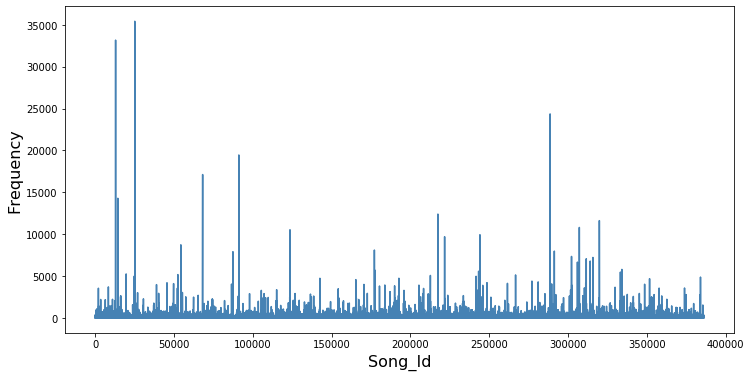

In [8]:
fd_list = sorted(fd.items())
x, y = zip(*fd_list) 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(x, y, color="steelblue")
ax.set_xlabel("Song_Id", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
plt.show()

[162829, 225, 76, 27, 19, 8, 2, 5, 3, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]


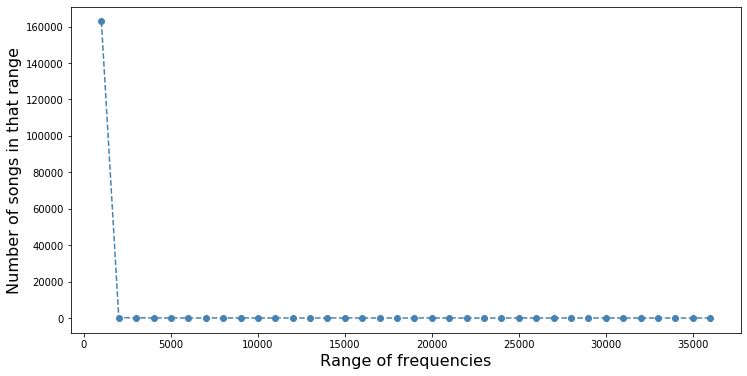

In [9]:
#fd_sorted_by_count_desc = sorted(fd.items(), key=operator.itemgetter(1),reverse=True)
ranges = [i for i in range(1000,37000,1000)]
bar_values = [0] * len(ranges)
for pair in fd_list:
    bar_values[int(pair[1]/1000)] += 1
print(bar_values)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(ranges, bar_values, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Range of frequencies", fontsize=16)
ax.set_ylabel("Number of songs in that range", fontsize=16)
plt.show()

[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
[163176, 20, 5, 2, 1, 0, 1, 1]


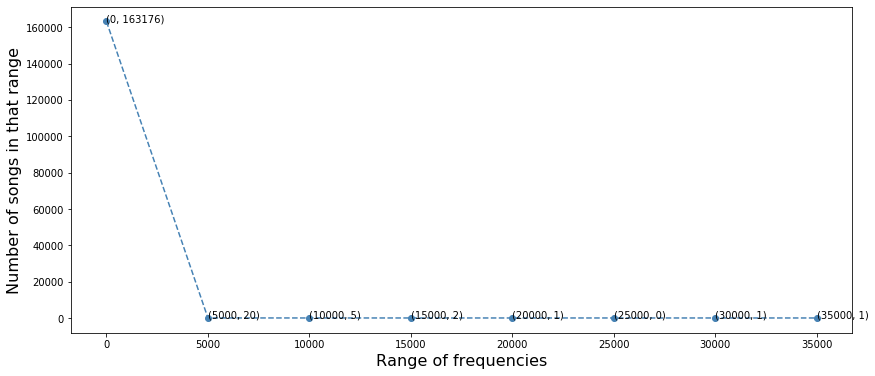

In [10]:
#fd_sorted_by_count_desc = sorted(fd.items(), key=operator.itemgetter(1),reverse=True)
ranges = [i for i in range(0,40000,5000)]
bar_values = [0] * len(ranges)
for pair in fd_list:
    bar_values[int(pair[1]/5000)] += 1
print(ranges)
print(bar_values)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(ranges, bar_values, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Range of frequencies", fontsize=16)
ax.set_ylabel("Number of songs in that range", fontsize=16)
for i in range(0,len(ranges)):
    plt.text(ranges[i], bar_values[i],'({}, {})'.format(ranges[i], bar_values[i]))
plt.show()

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000]
[162829, 225, 76, 27, 19, 8, 2, 5, 3, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
163206


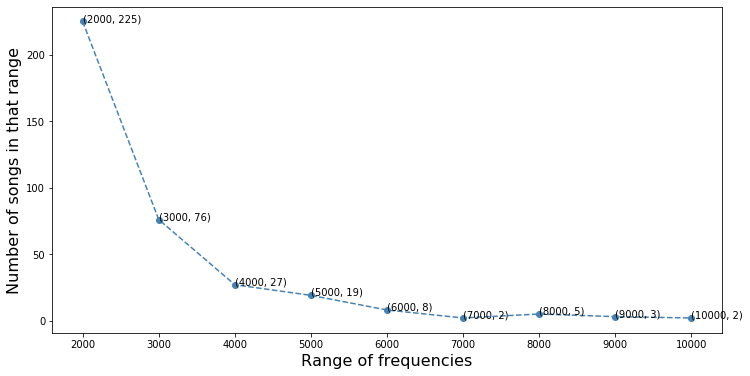

In [17]:
#fd_sorted_by_count_desc = sorted(fd.items(), key=operator.itemgetter(1),reverse=True)
ranges = [i for i in range(1000,37000,1000)]
bar_values = [0] * len(ranges)
for pair in fd_list:
    bar_values[int(pair[1]/1000)] += 1
print(ranges)
print(bar_values)
print(sum(bar_values))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(ranges[1:10], bar_values[1:10], color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Range of frequencies", fontsize=16)
ax.set_ylabel("Number of songs in that range", fontsize=16)
for i in range(1,10):
    plt.text(ranges[i], bar_values[i],'({}, {})'.format(ranges[i], bar_values[i]))
plt.show()

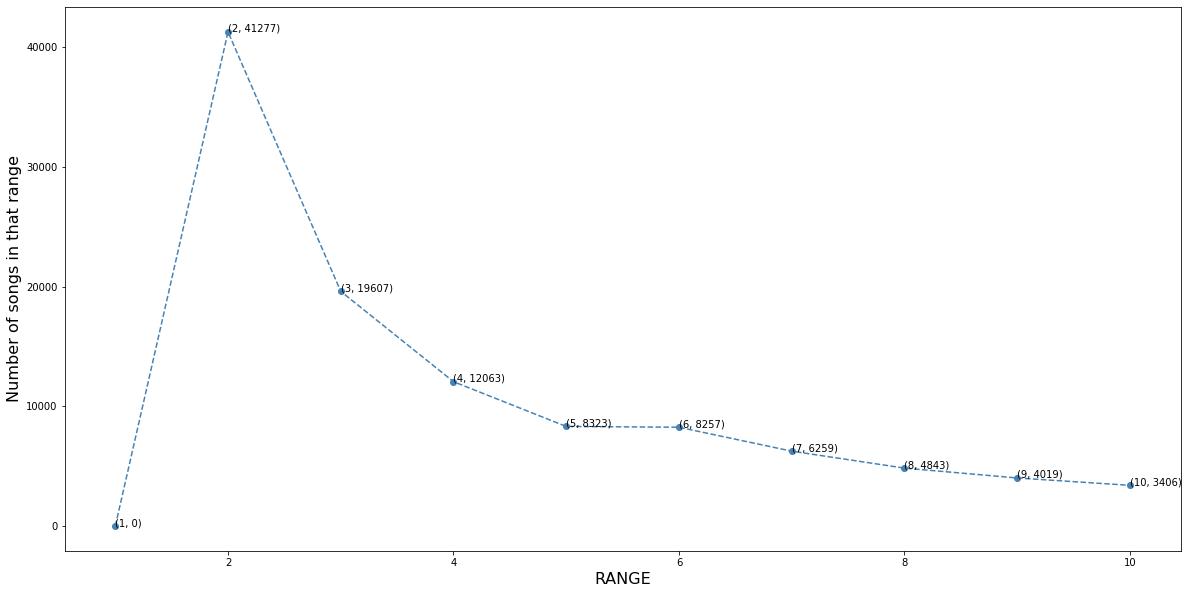

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10),)
ax.plot(ranges[0:10], bar_values[0:10], color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("RANGE", fontsize=16)
ax.set_ylabel("Number of songs in that range", fontsize=16)
for i in range(0,10):
    plt.text(ranges[i], bar_values[i],'({}, {})'.format(ranges[i], bar_values[i]))
plt.show()

163206


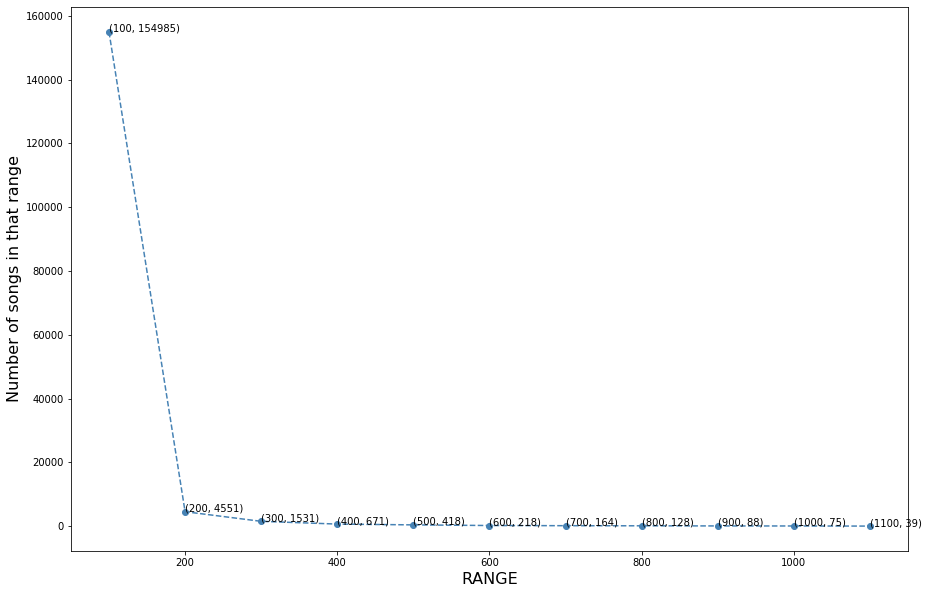

In [18]:
#fd_sorted_by_count_desc = sorted(fd.items(), key=operator.itemgetter(1),reverse=True)
ranges = [i for i in range(100,37000,100)]
bar_values = [0] * len(ranges)
for pair in fd_list:
    bar_values[int(pair[1]/100)] += 1
# print(ranges)
# print(bar_values)
print(sum(bar_values))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
ax.plot(ranges[0:11], bar_values[0:11], color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("RANGE", fontsize=16)
ax.set_ylabel("Number of songs in that range", fontsize=16)
for i in range(0,11):
    plt.text(ranges[i], bar_values[i],'({}, {})'.format(ranges[i], bar_values[i]))
plt.show()

108054


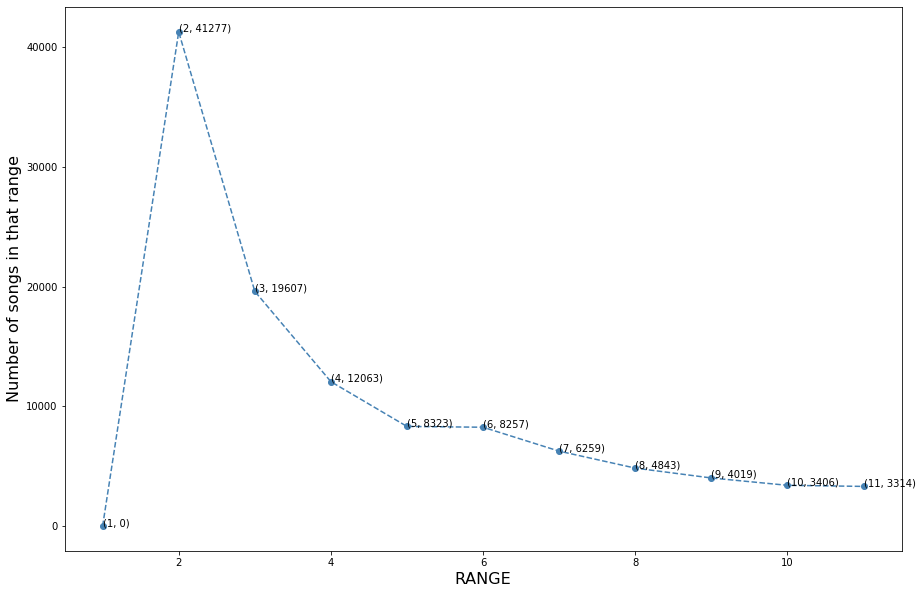

In [19]:
#fd_sorted_by_count_desc = sorted(fd.items(), key=operator.itemgetter(1),reverse=True)
ranges = [i for i in range(1,36000)]
bar_values = [0] * len(ranges)
for pair in fd_list:
    bar_values[int(pair[1]/1)] += 1
# print(ranges)
# print(bar_values)
print(sum(bar_values[0:10]))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
ax.plot(ranges[0:11], bar_values[0:11], color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("RANGE", fontsize=16)
ax.set_ylabel("Number of songs in that range", fontsize=16)
for i in range(0,11):
    plt.text(ranges[i], bar_values[i],'({}, {})'.format(ranges[i], bar_values[i]))
plt.show()

In [43]:
for itemset in uid_songid_file_data:
    for item_num in range(len(itemset)):
        itemset[item_num] = songid_mappings[itemset[item_num]]    

In [44]:
uid_songid_transaction_data = uid_songid_file_data[1:5000]

In [73]:
transaction_encoder = TransactionEncoder()
transaction_encoder_nd_array = transaction_encoder.fit(uid_songid_transaction_data).transform(uid_songid_transaction_data)
df = pd.DataFrame(transaction_encoder_nd_array, columns=transaction_encoder.columns_)
#df

In [82]:
sys.stdout.flush()

In [97]:
from mlxtend.frequent_patterns import apriori

#apriori(df, min_support=0.0015)